
### Análise de Dados de mobilidade do município de João Pessoa.
 <div style="text-align: center">Artur Iury de Almeida Salviano </div>


#### Introdução


<div style="text-align: justify">
Devido a pandemia gerada pelo SARS-CoV-2, causador do COVID-19, houve alterações na mobilidade em todos os países, incluindo o nosso. Essa situação também não foi diferente na cidade de João Pessoa:a ida à mercados, farmácias, parques,  locais de trabalho e até mesmo nas residencia, houveram mudanças quanto ao deslocamento das pessoas. Com isso, à análise dos dados deve ajudar a compreender os locais onde teve aumento e/ou até mesmo a diminuição dos Pessoenses. Também haverá a análise de onde teve a maior taxa de pessoas com o vírus, como também a avaliação das pessoas que contrairam a doença, frequentou tais localidades. 
   
</div>



#### Dados Usados

<div style="text-align: justify">
O Dataset mostra a mudança do aumento ou diminuição dos locais de todo o país de <b>02/03/2020 à 27/11/2020</b>, de acordo com a linha base, onde o percentual pode ser negativo ou posítivo dependedo da localidade.
  
</div>



#### Pré-processamento

<div style="text-align: justify">
Como o Dataset mostra de todo o país, o foco dos dados será voltado para a cidade de João Pessoa.
   
  
</div>


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

df_brasil = pd.read_csv('2020_BR_Region_Mobility_Report.csv') # dataset de todo o país

,country_region_code,country_region,sub_region_1,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_2,,,,,,,,,,,,,
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-02-15,1.0,5.0,-22.0,6.0,3.0,1.0
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-02-16,-8.0,7.0,-27.0,26.0,-3.0,3.0
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-02-17,-7.0,-1.0,3.0,22.0,15.0,-2.0
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-02-18,-7.0,-3.0,-24.0,-1.0,14.0,-1.0
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-02-19,-6.0,-2.0,-24.0,1.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-11-23,-23.0,11.0,-41.0,-22.0,-5.0,9.0
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-11-24,-19.0,14.0,-42.0,-29.0,-7.0,9.0
João Pessoa,BR,Brazil,State of Paraíba,NaN,NaN,NaN,2020-11-25,-13.0,11.0,-38.0,-27.0,-5.0,9.0




Será feito:
    
    
Converter a coluna **date** de string para datetime para ajudar no plot dos gráficos, caso necessecite usar as datas;
    
Adicionar as colunas <b>dia, mês e ano</b>, caso precise fazer uma análise dos dados por data;
    
Remover as colunas onde todos tem NaN, pois não servirá para a análise dos dados.
  



In [40]:
date = df_brasil['date']
date = pd.to_datetime(date)
df_brasil['date'] = date
df_brasil['dia'] = df_brasil['date'].dt.day
df_brasil['mês'] = df_brasil['date'].dt.month
df_brasil['ano'] = df_brasil['date'].dt.year

df_cidades = df_brasil.set_index('sub_region_2') # indice onde corresponde as cidades do país
df_jp = df_cidades.loc['João Pessoa'] # dataseta só da cidade de joão pessoa
df_jp= df_jp.dropna(axis=1, how='all') # removendo as colunas com NaN
df_jp


,country_region_code,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,dia,mes,ano,mês
sub_region_2,,,,,,,,,,,,,,
João Pessoa,BR,Brazil,State of Paraíba,2020-02-15,1.0,5.0,-22.0,6.0,3.0,1.0,15,2,2020,2
João Pessoa,BR,Brazil,State of Paraíba,2020-02-16,-8.0,7.0,-27.0,26.0,-3.0,3.0,16,2,2020,2
João Pessoa,BR,Brazil,State of Paraíba,2020-02-17,-7.0,-1.0,3.0,22.0,15.0,-2.0,17,2,2020,2
João Pessoa,BR,Brazil,State of Paraíba,2020-02-18,-7.0,-3.0,-24.0,-1.0,14.0,-1.0,18,2,2020,2
João Pessoa,BR,Brazil,State of Paraíba,2020-02-19,-6.0,-2.0,-24.0,1.0,12.0,0.0,19,2,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
João Pessoa,BR,Brazil,State of Paraíba,2020-11-23,-23.0,11.0,-41.0,-22.0,-5.0,9.0,23,11,2020,11
João Pessoa,BR,Brazil,State of Paraíba,2020-11-24,-19.0,14.0,-42.0,-29.0,-7.0,9.0,24,11,2020,11
João Pessoa,BR,Brazil,State of Paraíba,2020-11-25,-13.0,11.0,-38.0,-27.0,-5.0,9.0,25,11,2020,11


#### Perguntas

<div style="text-align: justify">
  Por conta da pandemia, houve o isolamento social em toda João Pessoa. Então devido à isso, ocorreu uma mudança no percentual de pessoas no trabalho (GRÁFICO 1) e no transporte público (GRÁFICO 2).
  
</div>


Text(0.5, 1.0, 'GRÁFICO 1: mudança no percentual de pessoas no trabalho:\n')

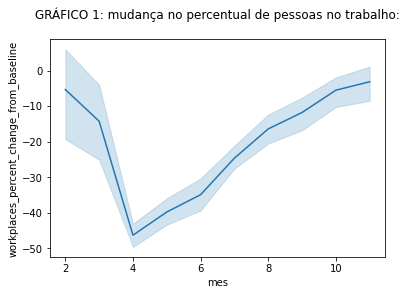

In [44]:
sns.lineplot(data=df_jp, x='mes', y='workplaces_percent_change_from_baseline').set_title('GRÁFICO 1: mudança no percentual de pessoas no trabalho:\n')

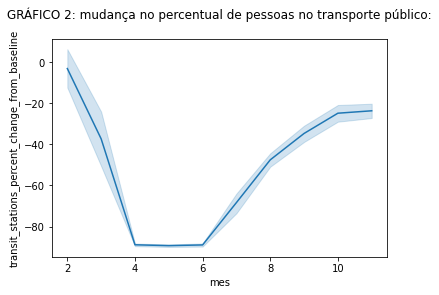

In [46]:
g = sns.lineplot(data=df_jp, x='mes', y='transit_stations_percent_change_from_baseline').set_title('GRÁFICO 2: mudança no percentual de pessoas no transporte público:\n')

<div style="text-align: justify">
    Os dois gráficos mostram que houve um queda brusca até o mês 4, onde no <b>GRÁFICO 1</b> temos uma queda de quase 50% e no <b>GRÁFICO 2</b> uma queda maior que 80%.   
</div>

<div style="text-align: justify"> <b>Questão 1:</b> Dado as informações acima, faça a correlação entre a mudança de percentual de pessoas no trabalho e no transporte público, e informe se ela é fraco, moderado, forte. Justifique a resposta.


</div>

#### Resposta:

In [21]:
df_jp[['workplaces_percent_change_from_baseline','transit_stations_percent_change_from_baseline']].corr()

,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline,1.000000,0.790122
transit_stations_percent_change_from_baseline,0.790122,1.000000


A correlação é forte, pois a mesma possui  0.790122. Essa correlação existe, pois uma grande da população necessita do transporte público para se locomover, principalmente para o trabalho.

<div style="text-align: justify"> <b>Questão 2:</b> No GRÁFICO 2, vemos que entre o mês 4 e 6 não há mudança no percentual, contudo a partir do mês 6, se vê uma mudança no crescimento. Esse aumento ocorreu por conta da volta dos transportes públicos da cidade. Plote um gráfico de dispersão dos dias, entre os meses <b>(2 e 4),(4 e 6) e (6 e 11)</b>, explicando cada gráfico. 


</div>

#### Resposta:

In [22]:
df_mes = df_jp.set_index('mes') #colocando a coluna mes como índice
df_mes

,country_region_code,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,dia,ano
mes,,,,,,,,,,,,
2,BR,Brazil,State of Paraíba,2020-02-15,1.0,5.0,-22.0,6.0,3.0,1.0,15,2020
2,BR,Brazil,State of Paraíba,2020-02-16,-8.0,7.0,-27.0,26.0,-3.0,3.0,16,2020
2,BR,Brazil,State of Paraíba,2020-02-17,-7.0,-1.0,3.0,22.0,15.0,-2.0,17,2020
2,BR,Brazil,State of Paraíba,2020-02-18,-7.0,-3.0,-24.0,-1.0,14.0,-1.0,18,2020
2,BR,Brazil,State of Paraíba,2020-02-19,-6.0,-2.0,-24.0,1.0,12.0,0.0,19,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
11,BR,Brazil,State of Paraíba,2020-11-23,-23.0,11.0,-41.0,-22.0,-5.0,9.0,23,2020
11,BR,Brazil,State of Paraíba,2020-11-24,-19.0,14.0,-42.0,-29.0,-7.0,9.0,24,2020
11,BR,Brazil,State of Paraíba,2020-11-25,-13.0,11.0,-38.0,-27.0,-5.0,9.0,25,2020


In [23]:
df_2_4 = df_mes.loc['2':'4'] # pegando apenas os indices entre os meses 2 e 4
df_4_6 = df_mes.loc['4':'6'] # pegando apenas os indices entre os meses 4 e 6
df_6_11 = df_mes.loc['6':'9'] # pegando apenas os indices entre os meses 6 e 11

<AxesSubplot:xlabel='dia', ylabel='transit_stations_percent_change_from_baseline'>

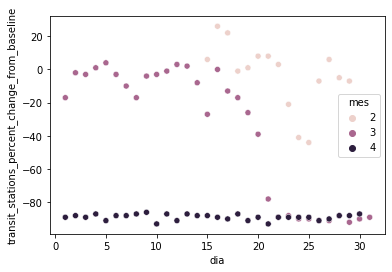

In [39]:
sns.scatterplot(data=df_2_4,x='dia',y='transit_stations_percent_change_from_baseline', hue='mes')

Pelo gráfico, no mês 2 houveram bastantes mudanças de percentual, caindo após o dia 15/02, dia onde foi decretado a pandemia no país e a recomendação do isolamento.

No mês 3 mostra uma variação, porém pouca entre os dias 1 e 15, ficando entre -20% e 20%. Houve queda a partir do dia 15.

Como os transportes públicos foram paralizados no mês 4, foi mantido a dispersão abaixo dos -80%.

<AxesSubplot:xlabel='dia', ylabel='transit_stations_percent_change_from_baseline'>

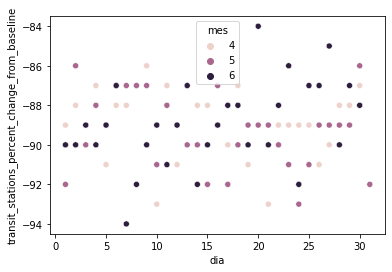

In [25]:
sns.scatterplot(data=df_4_6,x='dia',y='transit_stations_percent_change_from_baseline', hue='mes')

 Como a paralização ocorreu dentre os meses de 4 à 6, é percepctével quase uma constância nas porcentagem para cada dia entre os meses 4,5 e 6.

<AxesSubplot:xlabel='dia', ylabel='transit_stations_percent_change_from_baseline'>

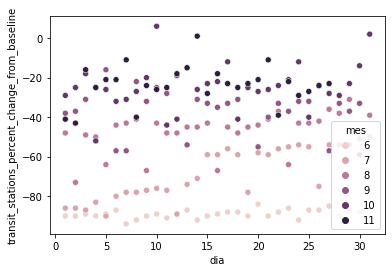

In [26]:
sns.scatterplot(data=df_6_11,x='dia',y='transit_stations_percent_change_from_baseline', hue='mes')

A partir do mês 6,ocorreu a volta dos transportes públicos. Por isso a dispersão cresce a cada mês, de acordo com as cores apresentada no gráfico acima.

<div style="text-align: justify"> <b>Questão 3:</b> Dado o Grafico abaixo:


</div>

<AxesSubplot:xlabel='parks_percent_change_from_baseline', ylabel='residential_percent_change_from_baseline'>

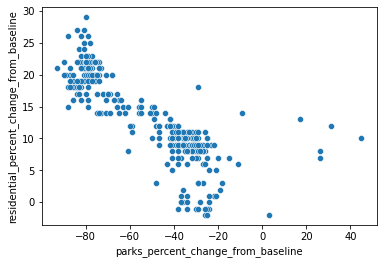

In [37]:
sns.scatterplot(data=df_jp,x='parks_percent_change_from_baseline',y='residential_percent_change_from_baseline')

Faça um agrupamento de k=2.

#### Resposta:

<AxesSubplot:xlabel='parks_percent_change_from_baseline', ylabel='residential_percent_change_from_baseline'>

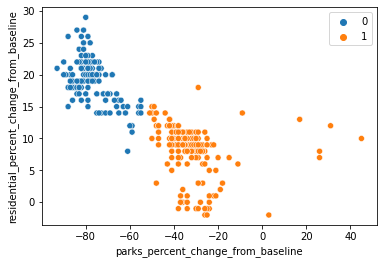

In [38]:
df = df_jp[['parks_percent_change_from_baseline','residential_percent_change_from_baseline']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
sns.scatterplot(data=df,x='parks_percent_change_from_baseline',y='residential_percent_change_from_baseline',hue=kmeans.labels_)


### Conclusão

<div style="text-align: justify">
  O Dataset mostra a mudança do percentual de cada localidade. Alguns desses resultado pode ser refletidos no outro, como é mostrado na <b>Questão 1 e 2</b>, onde a queda de pessoas no local de trabalho é quase igual a da quantidade nos transportes públicos. A principal diferença é que, os transportes tiveram uma paralização na cidade, mas nem todos os locais de trabalho foram interrompidos, onde há uma diferença na queda. Algumas limitações é dada pelo fato de que são dados coletados pela Google de acordo com as pessoas que mantem seu GPS ativado. Isso pode interferir nos dados, pois pode haver um grande número de pessoas que não utilizam o GPS ou de pessoas que não tem acesso à internet em todos os locais que frequenta, como nos transportes públicos. Pode-se aplicar os dados para saber se a localidade com um percentual de pessoas elevado, pode ter causado um aumento da transmissão do SARS-CoV-19 na região. Outra alternativa é utilizá-los para saber onde há um grande número de pessoas frequentando as localidades citadas acima.
  
</div>
